In [1]:
#Import bibliotek
import pandas as pd
import csv as csv
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import scipy
#import sklearn
import Analysis
sns.set_theme(style="darkgrid")

In [2]:
#Zmienne konfiguracyjne
path_s_d = "C:\\Users\\Robin\\Jupyter Notebooks\\Dane\\Dane zebrane - Warszawa\\Warszawa.csv"

In [3]:
#Wczytanie plików .csv pandasem
df = pd.read_csv(filepath_or_buffer = path_s_d, delimiter = ";", encoding='cp1250', low_memory=False)#, index_col=[0])
df['Pora roku'] = 0
df.loc[(df['Miesiac']<3) |(df['Miesiac']==12),'Pora roku']=4
df.loc[(2<df['Miesiac']) & (df['Miesiac']<6),'Pora roku']=1
df.loc[(5<df['Miesiac']) & (df['Miesiac']<9),'Pora roku']=2
df.loc[(8<df['Miesiac']) & (df['Miesiac']<12),'Pora roku']=3
df.loc[(df['Wysokosc pokrywy snieznej [cm]'] >= 15)&(df['Czas trwania wiatru >=10m/s [godziny]'] >= 1),'sniegkolor'] = 250
df['Temp_diff'] = df['Maksymalna temperatura dobowa [oC]'] - df['Minimalna temperatura dobowa [oC]']

Lata = df['Rok'].drop_duplicates().copy().to_frame()
Lata.reset_index(inplace=True)
Lata.drop(columns='index',inplace=True)

Miesiace = df['Miesiac'].drop_duplicates().copy().to_frame()
Miesiace.reset_index(inplace=True)
Miesiace.drop(columns='index',inplace=True)

0        3.0
1        8.5
2        4.1
3        7.2
4        7.7
        ... 
20449    7.7
20450    5.8
20451    2.0
20452    6.8
20453    7.5
Name: Temp_diff, Length: 20454, dtype: float64


In [4]:
#Utworzenie dataFrame Ulewa
Ulewa = df.copy()
Ulewa['Kolor'] = np.zeros(20454)
df['Kolor'] = np.zeros(20454)
df['sniegkolor'] = np.zeros(20454)
df['sniegkolor'] = 10
Temp = np.zeros(20454)
for x in range(1,(int)(Ulewa.size / Ulewa.columns.size)):
    Temp[x] = Ulewa.iloc[x]['Srednie dobowe cisnienie na poziomie stacji [hPa]'] - Ulewa.iloc[x-1]['Srednie dobowe cisnienie na poziomie stacji [hPa]']
Ulewa['dP'] = Temp
df['dP'] = Temp

In [5]:
#Przygotowanie 
Ulewa = Ulewa.loc[(Ulewa['Rodzaj opadu [S/W/ ]'] == 'W') & (Ulewa['Status pomiaru SMDB'] != '8')]
Ulewa = Ulewa.loc[(Ulewa['Status pomiaru PPPS'] != '8') & (Ulewa['Status pomiaru WLGS'] != '8')]
Ulewa = Ulewa.loc[(Ulewa['Status pomiaru STD'] != '8')]
Deszcz=Ulewa.loc[Ulewa['Suma dobowa opadu [mm]'] > 0].copy()
Ulewa=Ulewa.loc[Ulewa['Suma dobowa opadu [mm]'] > 30]

In [6]:
Ulewa.loc[(Ulewa['Czas trwania wiatru >=10m/s [godziny]'] == 0 , 'Kolor')] = 10
Ulewa.loc[(Ulewa['Czas trwania wiatru >=10m/s [godziny]'] > 0 , 'Kolor')] = 128
Ulewa.loc[(Ulewa['Czas trwania wiatru >15m/s [godziny]'] > 0 , 'Kolor')] = 255

df.loc[(df['Suma dobowa opadu [mm]'] <= 30 , 'Kolor')] = 10
df.loc[(df['Suma dobowa opadu [mm]'] > 30 , 'Kolor')] = 255

C:\Users\Robin\AppData\Local\Temp\ipykernel_24320\2432532405.py:47: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([scatter1,scatter2], labels=['Wszystkie dni','Dni ulewne'], title="Legenda")


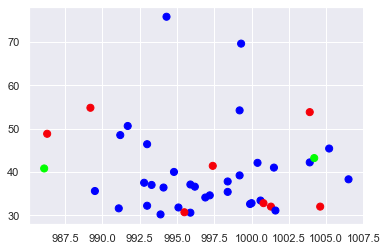

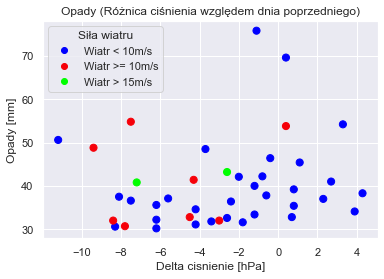

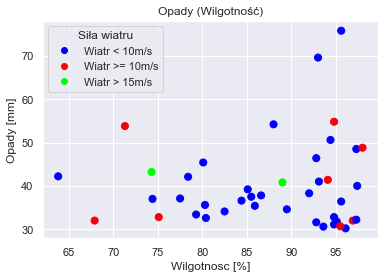

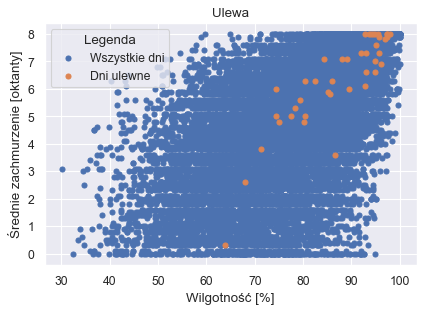

In [7]:
Opady = Ulewa['Suma dobowa opadu [mm]']
Cisnienie = Ulewa['Srednie dobowe cisnienie na poziomie stacji [hPa]']
Cisnienie2 = df.loc[df['Suma dobowa opadu [mm]']==0, 'Srednie dobowe cisnienie na poziomie stacji [hPa]']
Cisnienie3 = Deszcz['Srednie dobowe cisnienie na poziomie stacji [hPa]']
Cisnienie4 = df[ 'Srednie dobowe cisnienie na poziomie stacji [hPa]']
Srednia_temp = Ulewa['Srednia temperatura dobowa [oC]']
Wilgotnosc = Ulewa['Srednia dobowa wilgotnosc wzgledna [%]']
Kolor = Ulewa['Kolor']
fig, ax = plt.subplots()
Legenda = ['Wiatr < 10m/s','Wiatr >= 10m/s','Wiatr > 15m/s']
scatter = ax.scatter(Cisnienie, Opady, s=50, c= Kolor, cmap= 'brg')
# ax.set_title('Opady (Ciśnienie)')
# ax.set_xlabel('Cisnienie [hPa]')
# ax.set_ylabel('Opady [mm]')
# ax.legend(handles=scatter.legend_elements()[0], labels=Legenda, title="Siła wiatru")

fig, ax = plt.subplots()
scatter = ax.scatter(Ulewa['dP'], Opady, s=50, c= Kolor, cmap= 'brg')
ax.set_title('Opady (Różnica ciśnienia względem dnia poprzedniego)')
ax.set_xlabel('Delta cisnienie [hPa]')
ax.set_ylabel('Opady [mm]')
ax.legend(handles=scatter.legend_elements()[0], labels=Legenda, title="Siła wiatru")

# fig, ax = plt.subplots()
# scatter = ax.scatter(Srednia_temp, Opady, s=50, c= Kolor, cmap= 'brg')
# ax.set_title('Opady (Temp)')
# ax.set_xlabel('Temp')
# ax.set_ylabel('Opady [mm]')
# ax.legend(handles=scatter.legend_elements()[0], labels=Legenda, title="Siła wiatru")

fig, ax = plt.subplots()
scatter = ax.scatter(Wilgotnosc, Opady, s=50, c= Kolor, cmap= 'brg')
ax.set_title('Opady (Wilgotność)')
ax.set_xlabel('Wilgotnosc [%]')
ax.set_ylabel('Opady [mm]')
ax.legend(handles=scatter.legend_elements()[0], labels=Legenda, title="Siła wiatru")

fig, ax = plt.subplots()
fig.dpi = 80 #dpi = 72 H=4, W=6
fig.set_figheight(4)
fig.set_figwidth(6)
scatter1 = ax.scatter(df['Srednia dobowa wilgotnosc wzgledna [%]'],df['Srednie dobowe zachmurzenie ogolne [oktanty]'],   s=20)#, c= df['sniegkolor'], cmap= 'brg')
scatter2 = ax.scatter(Ulewa['Srednia dobowa wilgotnosc wzgledna [%]'],Ulewa['Srednie dobowe zachmurzenie ogolne [oktanty]'],   s=20)#, c= df['sniegkolor'], cmap= 'brg')
ax.set_title('Ulewa')
ax.set_xlabel('Wilgotność [%]')
ax.set_ylabel('Średnie zachmurzenie [oktanty]')
ax.legend([scatter1,scatter2], labels=['Wszystkie dni','Dni ulewne'], title="Legenda")

# fig, ax = plt.subplots()
# Opady.hist(bins = 20)#, by = 'Miesiac')
# ax.set_title('Histogram - Opady')
# ax.set_xlabel('Opady [mm]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Legenda = ['Wszystkie dni','Dni z opadami>0mm']
# ax.legend
# Cis2 = Cisnienie2.hist(bins = 50)
# Cis3 = Cisnienie3.hist(bins = 50)
# ax.set_title('Histogram - Ciśnienie')
# ax.set_xlabel('Ciśnienie [hPa]')
# ax.set_ylabel('Ilość pomiarów')
# ax.legend([Cis2,Cis3], labels=Legenda)

# fig, ax = plt.subplots()
# #Legenda = ['Wszystkie dni','Dni z opadami>0mm']
# #ax.legend
# #Cis3 = Cisnienie3.hist(bins = 50)
# Cis4 = Cisnienie4.hist(bins = 50)

# ax.set_title('Histogram - Ciśnienie')
# ax.set_xlabel('Ciśnienie [hPa]')
# ax.set_ylabel('Ilość pomiarów')
# ax.legend([Cis4], labels=Legenda)

# fig, ax = plt.subplots()
# Ulewa['dP'].hist(bins = 50)#, by = 'Miesiac')
# ax.set_title('Histogram - dP')
# ax.set_xlabel('Ciśnienie [hPa]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Srednia_temp.hist(bins = 20)#, by = 'Miesiac')
# ax.set_title('Histogram - Temperatura')
# ax.set_xlabel('Średnia temp. [C]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Wilgotnosc.hist(bins = 20)
# ax.set_title('Histogram - Wilgotność')
# ax.set_xlabel('Wilgotność [%]')
# ax.set_ylabel('Ilość pomiarów')

In [8]:
import math
print("dP - Opady")
Analysis.Korelacja(Ulewa['dP'], K2 = Opady)
print("\nCisnienie - Opady")
Analysis.Korelacja(K1=Cisnienie, K2 = Opady)
print("\nSrednia_temp - Opady")
Analysis.Korelacja(K1 = Srednia_temp, K2 = Opady)
print("\nWilgotnosc - Opady")
Analysis.Korelacja(K1 = Wilgotnosc, K2 = Opady)


dP - Opady
Korelacja Pearsona: 0.16176836618222415; p = 0.3060709420297663
Korelacja Spearmana: 0.2536375847484931; p = 0.10506462450126135
R^2: 0.16176836618222415 Std_err:0.40046515598213767

Cisnienie - Opady
Korelacja Pearsona: -0.09242401460565504; p = 0.5604669085056218
Korelacja Spearmana: -0.05284701153547125; p = 0.739599041255835
R^2: -0.09242401460565508 Std_err:0.313840169663743

Srednia_temp - Opady
Korelacja Pearsona: 0.14032504846005278; p = 0.37542221369347334
Korelacja Spearmana: 0.1770474532393442; p = 0.26200668655526593
R^2: 0.1403250484600528 Std_err:0.3131423246410271

Wilgotnosc - Opady
Korelacja Pearsona: 0.09537231697584556; p = 0.5479715681234318
Korelacja Spearmana: -0.07044137460736352; p = 0.6575583334160496
R^2: 0.09537231697584556 Std_err:0.17382483763050968


In [9]:
#Wczytanie plików .csv pandasem
Snow = df.copy()
Snow['Kolor'] = np.zeros(20454)

Temp = np.zeros(20454)
w0=0
m0=0
for x in range(1,(int)(Snow.size / Snow.columns.size)):
    Temp[x] = Snow.iloc[x]['Srednie dobowe cisnienie na poziomie stacji [hPa]'] - Snow.iloc[x-1]['Srednie dobowe cisnienie na poziomie stacji [hPa]']

Snow['dP'] = Temp

Temp = np.zeros(20454)
w0=0
m0=0
for x in range(1,(int)(Snow.size / Snow.columns.size)):
    Temp[x] = Snow.iloc[x]['Wysokosc pokrywy snieznej [cm]'] - Snow.iloc[x-1]['Wysokosc pokrywy snieznej [cm]']
Snow['dPs'] = Temp

Snow=Snow.loc[Snow['Wysokosc pokrywy snieznej [cm]'] >= 15]
Snow=Snow.loc[Snow['Czas trwania wiatru >=10m/s [godziny]'] >= 1]

#df['Czas trwania wiatru >=10m/s [godziny]']
Snow = Snow.loc[(Snow['Rodzaj opadu [S/W/ ]'] == 'S') & (Snow['Status pomiaru SMDB'] != '8')]
Snow = Snow.loc[(Snow['Status pomiaru PPPS'] != '8') & (Snow['Status pomiaru WLGS'] != '8')]
Snow = Snow.loc[(Snow['Status pomiaru STD'] != '8')]
Snow = Snow.loc[(Snow['Status pomiaru PKSN'] != '8')]



In [10]:
# Snow_tendencja = df.copy()
# Snow_tendencja=Snow_tendencja.loc[Snow_tendencja['Wysokosc pokrywy snieznej [cm]'] > 0]
# Snow_5_15=Snow_tendencja['Wysokosc pokrywy snieznej [cm]'].loc[(Snow_tendencja['Wysokosc pokrywy snieznej [cm]'] < 15) & (Snow_tendencja['Wysokosc pokrywy snieznej [cm]'] >= 5)].copy()
# Snow_0_5=Snow_tendencja['Wysokosc pokrywy snieznej [cm]'].loc[(Snow_tendencja['Wysokosc pokrywy snieznej [cm]'] < 5)].copy()
# Snow_15=Snow_tendencja['Wysokosc pokrywy snieznej [cm]'].loc[(Snow_tendencja['Wysokosc pokrywy snieznej [cm]'] >= 15)].copy()

# fig, ax = plt.subplots()
# Snow_5_15.hist(bins = 10)
# Snow_0_5.hist(bins = 10)
# Snow_15.hist(bins = 10)
# ax.set_title('Histogram - Wysokość pokrywy')
# ax.set_xlabel('Wysokość pokrywy [cm]')
# ax.set_ylabel('Ilość pomiarów')

In [11]:
Snow.loc[(Snow['Czas trwania wiatru >=10m/s [godziny]'] == 0 , 'Kolor')] = 10
Snow.loc[(Snow['Czas trwania wiatru >=10m/s [godziny]'] > 0 , 'Kolor')] = 128
Snow.loc[(Snow['Czas trwania wiatru >15m/s [godziny]'] > 0 , 'Kolor')] = 255

C:\Users\Robin\AppData\Local\Temp\ipykernel_24320\2478140506.py:59: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([scatter1,scatter2], labels=['brak śnieżycy','wystąpienie śnieżycy'], title="Legenda")
C:\Users\Robin\AppData\Local\Temp\ipykernel_24320\2478140506.py:70: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([scatter,scatter1], labels=['brak śnieżycy','wystąpienie śnieżycy'], title="Legenda")


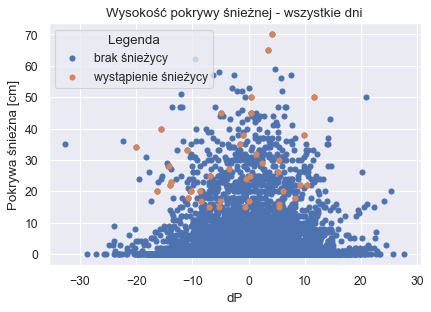

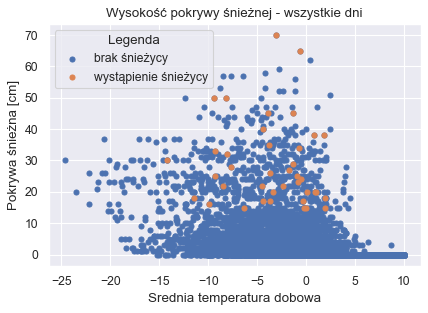

In [18]:
Opady_s = Snow['Suma dobowa opadu [mm]']
Cisnienie_s = Snow['Srednie dobowe cisnienie na poziomie stacji [hPa]']
Srednia_temp_s = Snow['Srednia temperatura dobowa [oC]']
Wilgotnosc_s = Snow['Srednia dobowa wilgotnosc wzgledna [%]']
Pokrywa_s = Snow['Wysokosc pokrywy snieznej [cm]']
Kolor = Snow['Kolor']

# fig, ax = plt.subplots()
# Legenda = ['Wiatr < 10m/s','Wiatr >= 10m/s','Wiatr > 15m/s']
# scatter = ax.scatter(Cisnienie_s, Opady_s, s=50, c= Kolor, cmap= 'brg')
# ax.set_title('Opady (Ciśnienie)')
# ax.set_xlabel('Cisnienie [hPa]')
# ax.set_ylabel('Opady [mm]')
# ax.legend(handles=scatter.legend_elements()[0], labels=Legenda, title="Siła wiatru")

# fig, ax = plt.subplots()
# scatter = ax.scatter(Snow['dP'], Opady_s, s=50, c= Kolor, cmap= 'brg')
# ax.set_title('Opady (Różnica ciśnienia względem dnia poprzedniego)')
# ax.set_xlabel('Delta cisnienie [hPa]')
# ax.set_ylabel('Opady [mm]')
# ax.legend(handles=scatter.legend_elements()[0], labels=Legenda, title="Siła wiatru")

# fig, ax = plt.subplots()
# scatter = ax.scatter(Srednia_temp_s, Opady_s, s=50, c= Kolor, cmap= 'brg')
# ax.set_title('Opady (Ciśnienie)')
# ax.set_xlabel('Cisnienie [hPa')
# ax.set_ylabel('Opady [mm]')
# ax.legend(handles=scatter.legend_elements()[0], labels=Legenda, title="Siła wiatru")

# fig, ax = plt.subplots()
# scatter = ax.scatter(Wilgotnosc_s, Opady_s, s=50, c= Kolor, cmap= 'brg')
# ax.set_title('Opady (Wilgotność)')
# ax.set_xlabel('Wilgotnosc [%]')
# ax.set_ylabel('Opady [mm]')
# ax.legend(handles=scatter.legend_elements()[0], labels=Legenda, title="Siła wiatru")

# fig, ax = plt.subplots()
# scatter = ax.scatter(Pokrywa_s, Opady_s, s=50, c= Kolor, cmap= 'brg')
# ax.set_title('Opady (Wilgotność)')
# ax.set_xlabel('Pokrywa śnieżna [cm]')
# ax.set_ylabel('Opady [mm]')
# ax.legend(handles=scatter.legend_elements()[0], labels=Legenda, title="Siła wiatru")

# fig, ax = plt.subplots()
# scatter = ax.scatter(Snow['dPs'], Opady_s, s=50, c= Kolor, cmap= 'brg')
# ax.set_title('Wysokość pokrywy śnieżnej (Różnica wysokości)')
# ax.set_xlabel('Delta wysokości [cm]')
# ax.set_ylabel('Opady [mm]')
# ax.legend(handles=scatter.legend_elements()[0], labels=Legenda, title="Siła wiatru")
fig, ax = plt.subplots()
fig.dpi = 80 #dpi = 72 H=4, W=6
fig.set_figheight(4)
fig.set_figwidth(6)
scatter1 = ax.scatter(df['dP'],df['Wysokosc pokrywy snieznej [cm]'],   s=20)#, c= df['sniegkolor'], cmap= 'brg')
scatter2 = ax.scatter(Snow['dP'],Snow['Wysokosc pokrywy snieznej [cm]'],   s=20)#, c= df['sniegkolor'], cmap= 'brg')
ax.set_title('Wysokość pokrywy śnieżnej - wszystkie dni')
ax.set_xlabel('dP')
ax.set_ylabel('Pokrywa śnieżna [cm]')
ax.legend([scatter1,scatter2], labels=['brak śnieżycy','wystąpienie śnieżycy'], title="Legenda")

fig, ax = plt.subplots()
fig.dpi = 80 #dpi = 72 H=4, W=6
fig.set_figheight(4)
fig.set_figwidth(6)
scatter = ax.scatter(df.loc[df['Srednia temperatura dobowa [oC]']<=10,'Srednia temperatura dobowa [oC]'],df.loc[df['Srednia temperatura dobowa [oC]']<=10,'Wysokosc pokrywy snieznej [cm]'],  s=20)#, c= df.loc[df['Srednia temperatura dobowa [oC]']<=10,'sniegkolor'], cmap= 'brg')
scatter1 = ax.scatter(Snow.loc[df['Srednia temperatura dobowa [oC]']<=10,'Srednia temperatura dobowa [oC]'],Snow.loc[Snow['Srednia temperatura dobowa [oC]']<=10,'Wysokosc pokrywy snieznej [cm]'],  s=20)#, c= Snow.loc[Snow['Srednia temperatura dobowa [oC]']<=10,'sniegkolor'], cmap= 'brg')
ax.set_title('Wysokość pokrywy śnieżnej - wszystkie dni')
ax.set_xlabel('Srednia temperatura dobowa')
ax.set_ylabel('Pokrywa śnieżna [cm]')
ax.legend([scatter,scatter1], labels=['brak śnieżycy','wystąpienie śnieżycy'], title="Legenda")


# fig, ax = plt.subplots()
# Opady_s.hist(bins = 50)#, by = 'Miesiac')
# ax.set_title('Histogram - Opady')
# ax.set_xlabel('Opady [mm]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Cisnienie_s.hist(bins = 20)#, by = 'Miesiac')
# ax.set_title('Histogram - Ciśnienie')
# ax.set_xlabel('Ciśnienie [hPa]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Snow['dP'].hist(bins = 50)#, by = 'Miesiac')
# ax.set_title('Histogram - dP')
# ax.set_xlabel('Ciśnienie [hPa]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Srednia_temp_s.hist(bins = 20)#, by = 'Miesiac')
# ax.set_title('Histogram - Temperatura')
# ax.set_xlabel('Średnia temp. [C]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Wilgotnosc_s.hist(bins = 20)
# ax.set_title('Histogram - Wilgotność')
# ax.set_xlabel('Wilgotność [%]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Snow['dPs'].hist(bins = 20)
# ax.set_title('Histogram - Różnica wysokości pokrywy')
# ax.set_xlabel('Różnica wysokości pokrywy')
# ax.set_ylabel('Ilość pomiarów')

In [20]:
Wichura = df.copy()
Wichura['Kolor'] = np.zeros(20454)

Temp = np.zeros(20454)
w0=0
m0=0
for x in range(1,(int)(Wichura.size / Wichura.columns.size)):
    Temp[x] = Wichura.iloc[x]['Srednie dobowe cisnienie na poziomie stacji [hPa]'] - Wichura.iloc[x-1]['Srednie dobowe cisnienie na poziomie stacji [hPa]']

Wichura['dP'] = Temp

#df[]
Wichura = Wichura.loc[(Wichura['Czas trwania wiatru >15m/s [godziny]'] != 0) & (Wichura['Status pomiaru FF15'] != '8')]
Wichura = Wichura.loc[(Wichura['Status pomiaru PPPS'] != '8')]
Wichura = Wichura.loc[(Wichura['Status pomiaru STD'] != '8')]

C:\Users\Robin\AppData\Local\Temp\ipykernel_24320\2125593619.py:65: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([scatter1,scatter2], labels=['wszystkie dni','wystąpienie wichury'], title="Siła wiatru")


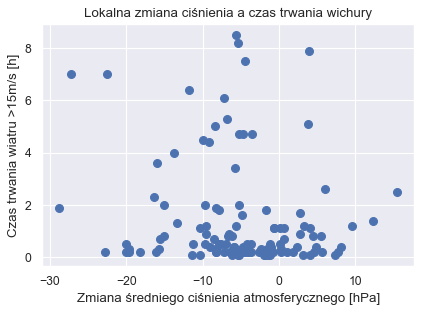

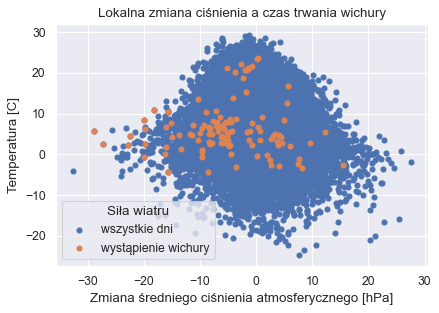

In [23]:
Czas_w = Wichura['Czas trwania wiatru >15m/s [godziny]']
Cisnienie_w = Wichura['Srednie dobowe cisnienie na poziomie stacji [hPa]']
Srednia_temp_w = Wichura['Srednia temperatura dobowa [oC]']
Kolor_w = Wichura['Srednia dobowa predkosc wiatru [m/s]']

temp1 = Wichura[['Czas trwania wiatru >15m/s [godziny]','Srednie dobowe cisnienie na poziomie stacji [hPa]','Srednia temperatura dobowa [oC]','Srednia dobowa predkosc wiatru [m/s]']]
temp1.columns = ['Wiatr >15m/s [h]', 'Śr ciśnienie atm [hPa]','Śr temp. [oC]','Śr v wiatru [m/s]']

# fig = px.scatter_3d(temp1, x= 'Śr ciśnienie atm [hPa]',
#                         z= 'Wiatr >15m/s [h]', 
#                         y= 'Śr temp. [oC]', color= 'Śr v wiatru [m/s]')
# fig.show()

# fig, ax = plt.subplots()
# Cisnienie_w.hist(bins = 20)#, by = 'Miesiac')
# ax.set_title('Histogram - Ciśnienie')
# ax.set_xlabel('Ciśnienie [hPa]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Wichura['dP'].hist(bins = 50)#, by = 'Miesiac')
# ax.set_title('Histogram - dP')
# ax.set_xlabel('Ciśnienie [hPa]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Srednia_temp_w.hist(bins = 20)#, by = 'Miesiac')
# ax.set_title('Histogram - Temperatura')
# ax.set_xlabel('Średnia temp. [C]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Czas_w.hist(bins = 50)
# ax.set_title('Histogram - Czas trwania wiatru >15m/s')
# ax.set_xlabel('Czas trwania wiatru >15m/s [h]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Kolor_w.hist(bins = 50)
# ax.set_title('Histogram - Średnia prędkość wiatru')
# ax.set_xlabel('Średnia prędkość wiatru [m/s]')
# ax.set_ylabel('Ilość pomiarów')

fig, ax = plt.subplots()
fig.dpi = 80 #dpi = 72 H=4, W=6
fig.set_figheight(4)
fig.set_figwidth(6)
scatter = ax.scatter(Wichura['dP'],Wichura['Czas trwania wiatru >15m/s [godziny]'],  s=50)#, c= df['sniegkolor'], cmap= 'brg')
ax.set_title('Lokalna zmiana ciśnienia a czas trwania wichury')
ax.set_xlabel('Zmiana średniego ciśnienia atmosferycznego [hPa]')
ax.set_ylabel('Czas trwania wiatru >15m/s [h]')

fig, ax = plt.subplots()
fig.dpi = 80 #dpi = 72 H=4, W=6
fig.set_figheight(4)
fig.set_figwidth(6)

# scatter1 = ax.scatter(df['dP'],df['Temp_diff'],  s=20)#, c= df['sniegkolor'], cmap= 'brg')
# scatter2 = ax.scatter(Wichura['dP'],Wichura['Temp_diff'],  s=20)#, c= df['sniegkolor'], cmap= 'brg')
scatter1 = ax.scatter(df['dP'],df['Srednia temperatura dobowa [oC]'],  s=20)#, c= df['sniegkolor'], cmap= 'brg')
scatter2 = ax.scatter(Wichura['dP'],Wichura['Srednia temperatura dobowa [oC]'],  s=20)#, c= df['sniegkolor'], cmap= 'brg')
ax.set_title('Lokalna zmiana ciśnienia a czas trwania wichury')
ax.set_xlabel('Zmiana średniego ciśnienia atmosferycznego [hPa]')
ax.set_ylabel('Temperatura [C]')
ax.legend([scatter1,scatter2], labels=['wszystkie dni','wystąpienie wichury'], title="Siła wiatru")


In [25]:
Burza = df.copy()
Burza['Kolor'] = np.zeros(20454)

Temp = np.zeros(20454)
w0=0
m0=0
for x in range(1,(int)(Burza.size / Burza.columns.size)):
    Temp[x] = Burza.iloc[x]['Srednie dobowe cisnienie na poziomie stacji [hPa]'] - Burza.iloc[x-1]['Srednie dobowe cisnienie na poziomie stacji [hPa]']

Burza['dP'] = Temp
#df['']
Burza = Burza.loc[(Burza['Czas trwania burzy  [godziny]'] > 0) & (Burza['Status pomiaru BRZA'] != '8')]
Burza = Burza.loc[(Burza['Status pomiaru PPPS'] != '8')]
Burza = Burza.loc[(Burza['Status pomiaru STD'] != '8')]
Burza = Burza.loc[(Burza['Status pomiaru DZBL'] != '8')]

C:\Users\Robin\AppData\Local\Temp\ipykernel_24320\12327522.py:83: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([scatter1,scatter2], labels=Legenda, title="Legenda")


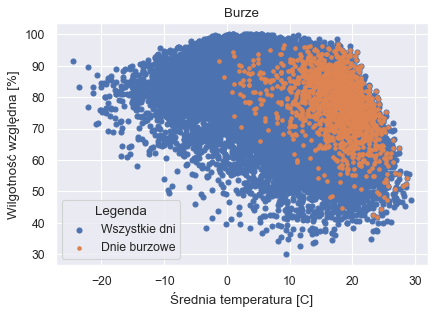

In [27]:
Czas_b = Burza['Czas trwania burzy  [godziny]']
Cisnienie_b = Burza['Srednie dobowe cisnienie na poziomie stacji [hPa]']
Srednia_temp_b = Burza['Srednia temperatura dobowa [oC]']
Wilgotnosc_b = Burza['Srednia dobowa wilgotnosc wzgledna [%]']
Sredni_wiatr_b = Burza['Srednia dobowa predkosc wiatru [m/s]']
Opady_b = Burza['Suma dobowa opadu [mm]']
Kolor_b = Burza['Wystapienie blyskawicy  [0/1]']

temp2 = Burza[['Czas trwania burzy  [godziny]','Srednie dobowe cisnienie na poziomie stacji [hPa]','Srednia temperatura dobowa [oC]','Srednia dobowa predkosc wiatru [m/s]', 'Srednia dobowa wilgotnosc wzgledna [%]','Suma dobowa opadu [mm]','Wystapienie blyskawicy  [0/1]']]
temp2.columns = ['Czas burzy [h]', 'Śr ciśnienie atm [hPa]','Śr temp. [oC]','Śr v wiatru [m/s]','Wilgotność [%]','Opady [mm]','Błyskawica [tak/nie]']

# fig = px.scatter_3d(temp2, x= 'Śr ciśnienie atm [hPa]',
#                         z= 'Czas burzy [h]', 
#                         y= 'Śr v wiatru [m/s]', color= 'Błyskawica [tak/nie]')
# fig.show()

# fig = px.scatter_3d(temp2, x= 'Śr temp. [oC]',
#                         z= 'Czas burzy [h]', 
#                         y= 'Śr v wiatru [m/s]', color= 'Błyskawica [tak/nie]')
# fig.show()

# fig = px.scatter_3d(temp2, x= 'Wilgotność [%]',
#                         z= 'Czas burzy [h]', 
#                         y= 'Śr v wiatru [m/s]', color= 'Błyskawica [tak/nie]')
# fig.show()

# fig = px.scatter_3d(temp2, x= 'Opady [mm]',
#                         z= 'Czas burzy [h]', 
#                         y= 'Śr v wiatru [m/s]', color= 'Błyskawica [tak/nie]')
# fig.show()



# fig, ax = plt.subplots()
# Cisnienie_b.hist(bins = 20)#, by = 'Miesiac')
# ax.set_title('Histogram - Ciśnienie')
# ax.set_xlabel('Ciśnienie [hPa]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Srednia_temp_b.hist(bins = 20)#, by = 'Miesiac')
# ax.set_title('Histogram - Temperatura')
# ax.set_xlabel('Średnia temp. [C]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Czas_b.hist(bins = 50)
# ax.set_title('Histogram - Czas trwania burzy')
# ax.set_xlabel('Czas trwania burzy [h]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Sredni_wiatr_b.hist(bins = 50)
# ax.set_title('Histogram - Średnia prędkość wiatru')
# ax.set_xlabel('Średnia prędkość wiatru [m/s]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Opady_b.hist(bins = 50)#, by = 'Miesiac')
# ax.set_title('Histogram - Opady')
# ax.set_xlabel('Opady [mm]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Wilgotnosc_b.hist(bins = 20)
# ax.set_title('Histogram - Wilgotność')
# ax.set_xlabel('Wilgotność [%]')
# ax.set_ylabel('Ilość pomiarów')

fig, ax = plt.subplots()
fig.dpi = 80 #dpi = 72 H=4, W=6
fig.set_figheight(4)
fig.set_figwidth(6)
Legenda = ['Wiatr < 10m/s','Wiatr >= 10m/s','Wiatr > 15m/s']
#scatter1 = ax.scatter(df['Minimalna temperatura dobowa [oC]'], df['Srednia dobowa wilgotnosc wzgledna [%]'], s=20)#, c= Kolor, cmap= 'brg')
scatter1 = ax.scatter(df['Srednia temperatura dobowa [oC]'], df['Srednia dobowa wilgotnosc wzgledna [%]'], s=20)#, c= Kolor, cmap= 'brg')
ax.set_title('Burze')
ax.set_xlabel('Średnia temperatura [C]')
ax.set_ylabel('Wilgotność względna [%]')
Legenda =['Wszystkie dni','Dnie burzowe']
#scatter2 = ax.scatter(Burza['Minimalna temperatura dobowa [oC]'], Burza['Srednia dobowa wilgotnosc wzgledna [%]'], s=10)#, c= Kolor, cmap= 'brg')
scatter2 = ax.scatter(Burza['Srednia temperatura dobowa [oC]'], Burza['Srednia dobowa wilgotnosc wzgledna [%]'], s=10)#, c= Kolor, cmap= 'brg')
ax.legend([scatter1,scatter2], labels=Legenda, title="Legenda")



In [ ]:
Heat = df.copy()
Heat['Kolor'] = np.zeros(20454)

Temp = np.zeros(20454)
w0=0
m0=0
for x in range(1,(int)(Heat.size / Heat.columns.size)):
    Temp[x] = Heat.iloc[x]['Srednie dobowe cisnienie na poziomie stacji [hPa]'] - Heat.iloc[x-1]['Srednie dobowe cisnienie na poziomie stacji [hPa]']

Heat['dP'] = Temp
#df['']
Heat = Heat.loc[(Heat['Status pomiaru TMAX'] != '8') & (Heat['Status pomiaru FWS'] != '8') & (Heat['Status pomiaru TMIN'] != '8')]
Heat = Heat.loc[(Heat['Status pomiaru PPPS'] != '8') & (Heat['Status pomiaru NOS'] != '8')]
Heat = Heat.loc[(Heat['Maksymalna temperatura dobowa [oC]'] >= 30) & (Heat['Minimalna temperatura dobowa [oC]'] >= 15)]

In [ ]:
Cisnienie_h = Heat['Srednie dobowe cisnienie na poziomie stacji [hPa]']
Sredni_wiatr_h = Heat['Srednia dobowa predkosc wiatru [m/s]']
Max_temp_h = Heat['Maksymalna temperatura dobowa [oC]']
Kolor_h = Heat['Srednie dobowe zachmurzenie ogolne [oktanty]']

temp3 = Heat[['Srednie dobowe cisnienie na poziomie stacji [hPa]','Srednia dobowa predkosc wiatru [m/s]','Maksymalna temperatura dobowa [oC]','Srednie dobowe zachmurzenie ogolne [oktanty]']]
temp3.columns = ['Śr. ciśnienie atm [hPa]','Śr. v wiatru [m/s]','Max temp. [oC]','Śr. zachmurzenie [oktanty]']

C:\Users\Robin\AppData\Local\Temp\ipykernel_18544\2071062274.py:17: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



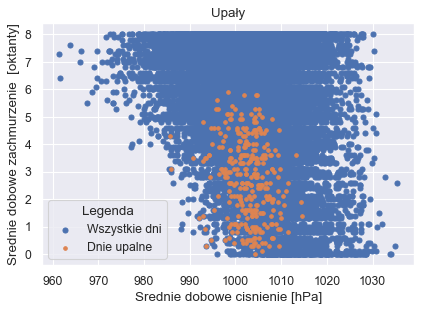

In [ ]:
# fig = px.scatter_3d(temp3, x= 'Śr. ciśnienie atm [hPa]',
#                         z= 'Max temp. [oC]', 
#                         y= 'Śr. v wiatru [m/s]', color= 'Śr. zachmurzenie [oktanty]', color_continuous_scale='Teal')
# fig.show()

fig, ax = plt.subplots()
fig.dpi = 80 #dpi = 72 H=4, W=6
fig.set_figheight(4)
fig.set_figwidth(6)
scatter1 = ax.scatter(df['Srednie dobowe cisnienie na poziomie stacji [hPa]'], df['Srednie dobowe zachmurzenie ogolne [oktanty]'], s=20)#, c= Kolor, cmap= 'brg')
#scatter1 = ax.scatter(df.loc[df['Pora roku']==2,'Srednie dobowe cisnienie na poziomie stacji [hPa]'], df.loc[df['Pora roku']==2,'Srednie dobowe zachmurzenie ogolne [oktanty]'], s=20)#, c= Kolor, cmap= 'brg')
ax.set_title('Upały')
ax.set_xlabel('Srednie dobowe cisnienie [hPa]')
ax.set_ylabel('Srednie dobowe zachmurzenie  [oktanty]')
Legenda =['Wszystkie dni','Dnie upalne']
scatter2 = ax.scatter(Heat['Srednie dobowe cisnienie na poziomie stacji [hPa]'], Heat['Srednie dobowe zachmurzenie ogolne [oktanty]'], s=10)#, c= Kolor, cmap= 'brg')
ax.legend([scatter1,scatter2], labels=Legenda, title="Legenda")


# fig, ax = plt.subplots()
# Max_temp_h.hist(bins = 50)
# ax.set_title('Histogram - Max temperatura')
# ax.set_xlabel('Temperatura [oC]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Cisnienie_h.hist(bins = 50)
# ax.set_title('Histogram - Ciśnienie')
# ax.set_xlabel('Ciśnienie [hPa]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Kolor_h.hist(bins = 50)
# ax.set_title('Histogram - Zachmurzenie')
# ax.set_xlabel('Zachmurzenie [oktanty]')
# ax.set_ylabel('Ilość pomiarów')

In [28]:
Cold = df.copy()
Cold['Kolor'] = np.zeros(20454)

Temp = np.zeros(20454)
w0=0
m0=0
for x in range(1,(int)(Cold.size / Cold.columns.size)):
    Temp[x] = Cold.iloc[x]['Srednie dobowe cisnienie na poziomie stacji [hPa]'] - Cold.iloc[x-1]['Srednie dobowe cisnienie na poziomie stacji [hPa]']

Cold['dP'] = Temp
#df['']
Cold = Cold.loc[(Cold['Status pomiaru TMAX'] != '8') & (Cold['Status pomiaru FWS'] != '8') & (Cold['Status pomiaru TMIN'] != '8')]
Cold = Cold.loc[(Cold['Status pomiaru PPPS'] != '8') & (Cold['Status pomiaru NOS'] != '8')]
Cold = Cold.loc[(Cold['Maksymalna temperatura dobowa [oC]'] <= -5) & (Cold['Minimalna temperatura dobowa [oC]'] <= -15)]

In [ ]:
Cisnienie_c = Cold['Srednie dobowe cisnienie na poziomie stacji [hPa]']
Sredni_wiatr_c = Cold['Srednia dobowa predkosc wiatru [m/s]']
Min_temp_c = Cold['Minimalna temperatura dobowa [oC]']
Kolor_c = Cold['Srednie dobowe zachmurzenie ogolne [oktanty]']

temp4 = Cold[['Srednie dobowe cisnienie na poziomie stacji [hPa]','Srednia dobowa predkosc wiatru [m/s]','Minimalna temperatura dobowa [oC]','Srednie dobowe zachmurzenie ogolne [oktanty]']]
temp4.columns = ['Śr. ciśnienie atm [hPa]','Śr. v wiatru [m/s]','Min temp. [oC]','Śr. zachmurzenie [oktanty]']

C:\Users\Robin\AppData\Local\Temp\ipykernel_24320\2135382090.py:34: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([scatter1,scatter2], labels=Legenda, title="Legenda"),
C:\Users\Robin\AppData\Local\Temp\ipykernel_24320\2135382090.py:51: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([scatter1,scatter2], labels=Legenda, title="Legenda")


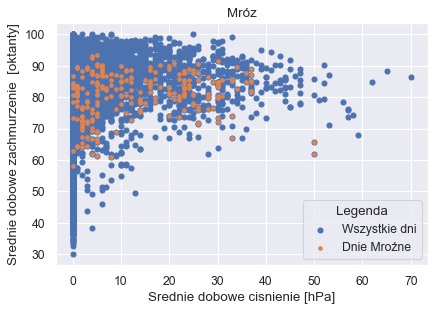

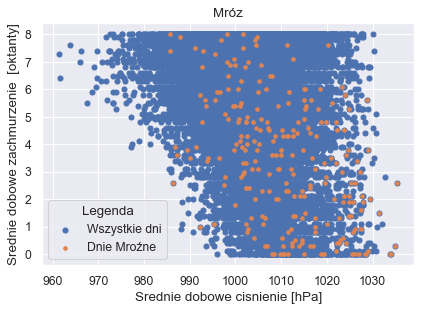

In [29]:
# fig = px.scatter_3d(temp4, x= 'Śr. ciśnienie atm [hPa]',
#                         z= 'Min temp. [oC]', 
#                         y= 'Śr. v wiatru [m/s]', color= 'Śr. zachmurzenie [oktanty]', color_continuous_scale='Teal')
# fig.show()

# fig, ax = plt.subplots()
# Min_temp_c.hist(bins = 50)
# ax.set_title('Histogram - Min temperatura')
# ax.set_xlabel('Temperatura [oC]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Cisnienie_c.hist(bins = 50)
# ax.set_title('Histogram - Ciśnienie')
# ax.set_xlabel('Ciśnienie [hPa]')
# ax.set_ylabel('Ilość pomiarów')

# fig, ax = plt.subplots()
# Kolor_c.hist(bins = 50)
# ax.set_title('Histogram - Zachmurzenie')
# ax.set_xlabel('Zachmurzenie [oktanty]')
# ax.set_ylabel('Ilość pomiarów')
fig, ax = plt.subplots()
fig.dpi = 80 #dpi = 72 H=4, W=6
fig.set_figheight(4)
fig.set_figwidth(6)
scatter1 = ax.scatter(df['Wysokosc pokrywy snieznej [cm]'], df['Srednia dobowa wilgotnosc wzgledna [%]'], s=20)#, c= Kolor, cmap= 'brg')
#scatter1 = ax.scatter(df.loc[df['Pora roku']==2,'Srednie dobowe cisnienie na poziomie stacji [hPa]'], df.loc[df['Pora roku']==2,'Srednie dobowe zachmurzenie ogolne [oktanty]'], s=20)#, c= Kolor, cmap= 'brg')
ax.set_title('Mróz')
ax.set_xlabel('Srednie dobowe cisnienie [hPa]')
ax.set_ylabel('Srednie dobowe zachmurzenie  [oktanty]')
Legenda =['Wszystkie dni','Dnie Mroźne']
scatter2 = ax.scatter(Cold['Wysokosc pokrywy snieznej [cm]'], Cold['Srednia dobowa wilgotnosc wzgledna [%]'], s=10)#, c= Kolor, cmap= 'brg')
ax.legend([scatter1,scatter2], labels=Legenda, title="Legenda"),



fig, ax = plt.subplots()
fig.dpi = 80 #dpi = 72 H=4, W=6
fig.set_figheight(4)
fig.set_figwidth(6)
#scatter1 = ax.scatter(df['Srednie dobowe cisnienie na poziomie stacji [hPa]'], df['Srednie dobowe zachmurzenie ogolne [oktanty]'], s=20)#, c= Kolor, cmap= 'brg')
#scatter1 = ax.scatter(df.loc[df['Pora roku']==2,'Srednie dobowe cisnienie na poziomie stacji [hPa]'], df.loc[df['Pora roku']==2,'Srednie dobowe zachmurzenie ogolne [oktanty]'], s=20)#, c= Kolor, cmap= 'brg')
scatter1 = ax.scatter(df['Srednie dobowe cisnienie na poziomie stacji [hPa]'], df['Srednie dobowe zachmurzenie ogolne [oktanty]'], s=20)#, c= Kolor, cmap= 'brg')
ax.set_title('Mróz')
ax.set_xlabel('Srednie dobowe cisnienie [hPa]')
ax.set_ylabel('Srednie dobowe zachmurzenie  [oktanty]')
Legenda =['Wszystkie dni','Dnie Mroźne']
#scatter2 = ax.scatter(Cold['Srednie dobowe cisnienie na poziomie stacji [hPa]'], Cold['Srednie dobowe zachmurzenie ogolne [oktanty]'], s=10)#, c= Kolor, cmap= 'brg')
scatter2 = ax.scatter(Cold['Srednie dobowe cisnienie na poziomie stacji [hPa]'], Cold['Srednie dobowe zachmurzenie ogolne [oktanty]'], s=10)#, c= Kolor, cmap= 'brg')
ax.legend([scatter1,scatter2], labels=Legenda, title="Legenda")

In [ ]:
# Cor_Temp2 = Ulewa[['Suma dobowa opadu [mm]','Srednie dobowe cisnienie na poziomie stacji [hPa]','Srednia temperatura dobowa [oC]']].copy()
# Cor_Temp = Cor_Temp2.corr()

# x = 'Srednie dobowe cisnienie na poziomie stacji [hPa]'
# y = 'Srednia temperatura dobowa [oC]'
# z = 'Suma dobowa opadu [mm]'

# # Pairings
# xz = Cor_Temp.loc[ x, z ]
# yz = Cor_Temp.loc[ y, z ]
# xy = Cor_Temp.loc[ x, y ]

# Rxyz = math.sqrt((abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2)) )
# R2 = Rxyz**2

# # Calculate adjusted R-squared
# n = len(Cor_Temp2) # Number of rows
# k = 2       # Number of independent variables
# R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )
# print('R2 = '+str(R2) +' R2_adj = ' + str(R2_adj))

In [ ]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from sklearn.manifold import Isomap
# from sklearn.linear_model import LogisticRegression

# # define dataset
# steps = [('iso', Isomap(n_components=2)), ('m', LogisticRegression())]
# model = Pipeline(steps=steps)
# # evaluate model
# tempnp = np.array([Cisnienie,Srednia_temp])
# tempnp2 = np.array(Opady)
# tempnp=np.moveaxis(tempnp,-1,0)
# print(tempnp.shape)
# print(tempnp)
# cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, tempnp, tempnp2, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# # evaluate isomap with logistic regression algorithm for classification
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from sklearn.manifold import Isomap
# from sklearn.linear_model import LogisticRegression
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# print(X.size)
# print(X.shape)
# print(X)
# print(y.size)
# print(y.shape)
# print(y)
# # define the pipeline
# steps = [('iso', Isomap(n_components=10)), ('m', LogisticRegression())]
# model = Pipeline(steps=steps)
# # evaluate model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

1. Ciśnienie -> Opady

test_log = ['Srednia dobowe cisnienie na poziomie stacji [hpa]'] > 0
test_log = ['Status pomiaru SMDB [hpa]'] != 8

dob_sr_cs = df['Srednia dobowe cisnienie na poziomie stacji [hpa]']
dob_sum_op = df['Suma dobowa opadu [mm]']

dob_sr_cs 

['Srednia dobowe cisnienie na poziomie stacji [hpa]'] -> ['Suma dobowa opadu [mm]']


X = df['column'].var()
df['column_name'].std()
df['column1'].median()
df.mode()

!# Korelacja spearmana
coef, p = scipy.stats.spearmanr(data1, data2)
!# Korelacja kandela
coef, p = scipy.stats.kendalltau(data1, data2)
!# Korelacja Pearsona
coef, p = scipy.stats.pearsonr(data1, data2)

Wykresy: (punktowy, liniowy, etc., heatmapa)